### **Project Title:
# Credit Card Fraud Detection Using Machine Learning

# Problem Statement:

The goal is to detect fraudulent credit card transactions in real-time using machine learning. By analyzing transaction details such as amount, merchant category, cardholder info, and location, the system should differentiate between legitimate and fraudulent transactions to minimize financial losses while keeping false positives low.


# Dataset Overview:

# Key Features:

Transaction_ID, Card_Type, Merchant_Category, Transaction_Amount,Transaction_DateTime, Location, Region, Device_Type, Day_of_Week
Cardholder_Age, Cardholder_Gender, Cardholder_Monthly_Income, Cardholder_Average_Spend, Credit_Limit

# Target: Is_Fraudulent (Yes/No)

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data=pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv")


In [ ]:
# Display the first few rows
data.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [ ]:
# Exploratory Data Analysis (EDA)
# Display basic information
print("Data Information:")
print(data.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                500

In [ ]:
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Transaction_Amount  Cardholder_Age  Cardholder_Monthly_Income  \
count         4994.000000     4865.000000                4686.000000   
mean         74667.995995       49.106680              137353.817542   
std          43089.045623       18.398524               69471.623020   
min          25008.000000       18.000000               35005.000000   
25%          39742.500000       33.000000               73485.000000   
50%          60922.000000       49.000000              131833.000000   
75%          98373.500000       65.000000              189054.250000   
max         199923.000000       80.000000              299907.000000   

       Cardholder_Average_Spend   Credit_Limit  
count               4792.000000    4991.000000  
mean               63058.343566  124654.377880  
std                40056.989704   55668.246494  
min                10282.410000   50000.000000  
25%                33336.742500  100000.000000  
50%                49547.945000  100

In [ ]:
# check for null values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Transaction_ID                 0
Card_Type                     17
Merchant_Category             22
Transaction_Amount             6
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64


Categorical features: ['Card_Type', 'Merchant_Category', 'Location', 'Region', 'Device_Type', 'Day_of_Week', 'Cardholder_Gender', 'Credit_Limit']


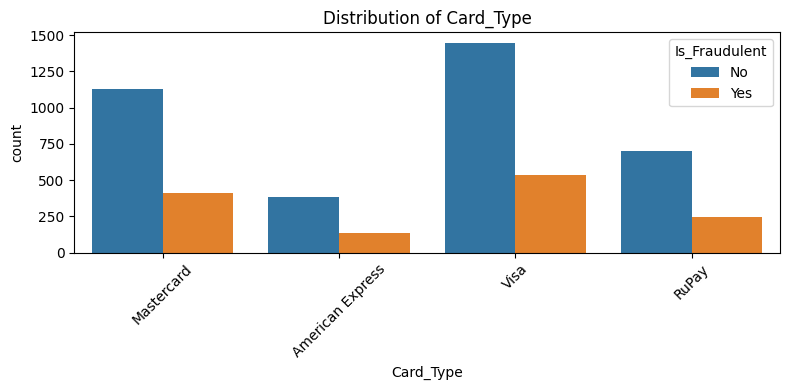

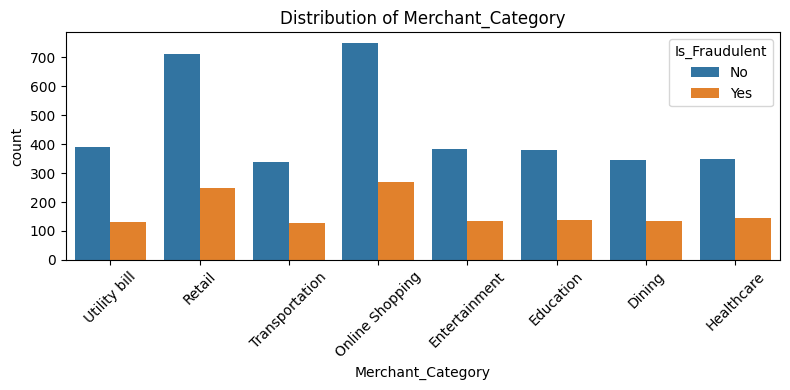

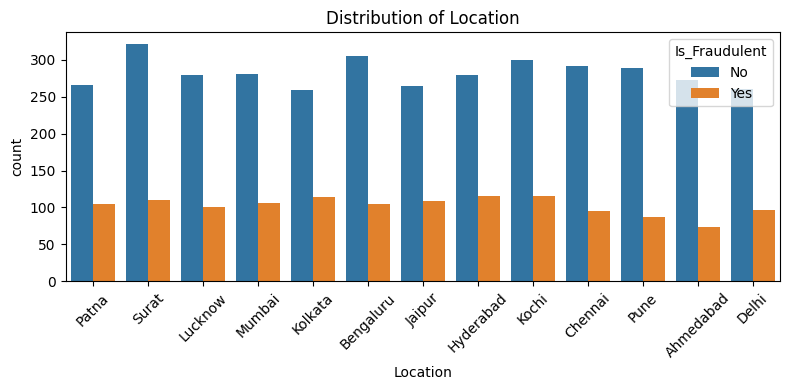

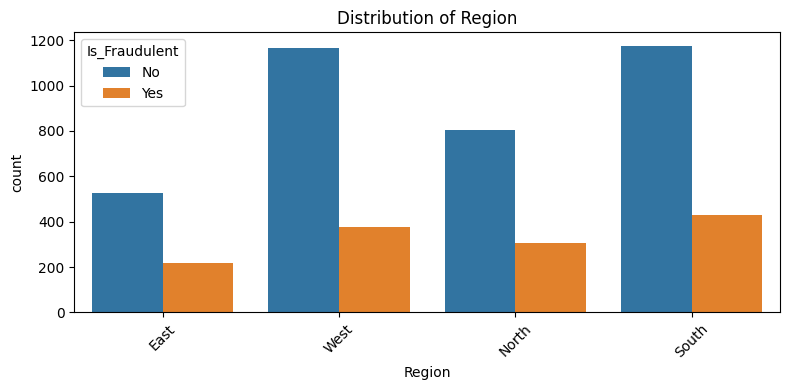

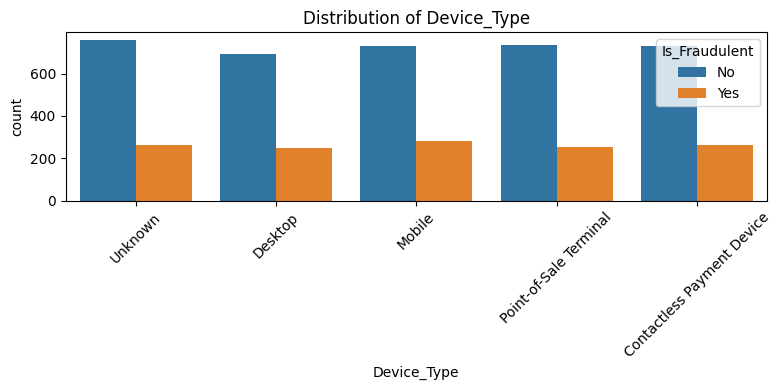

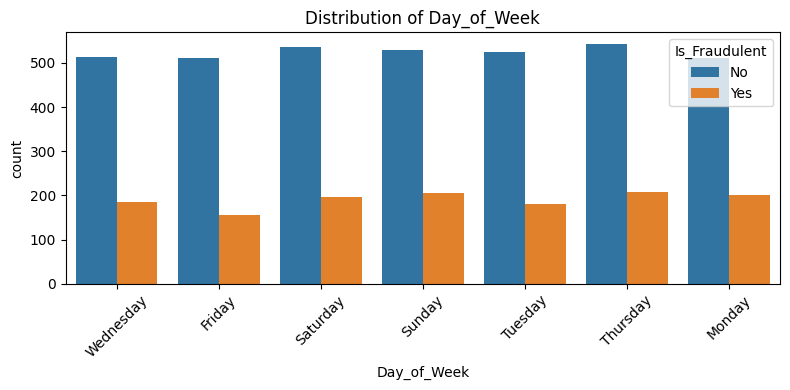

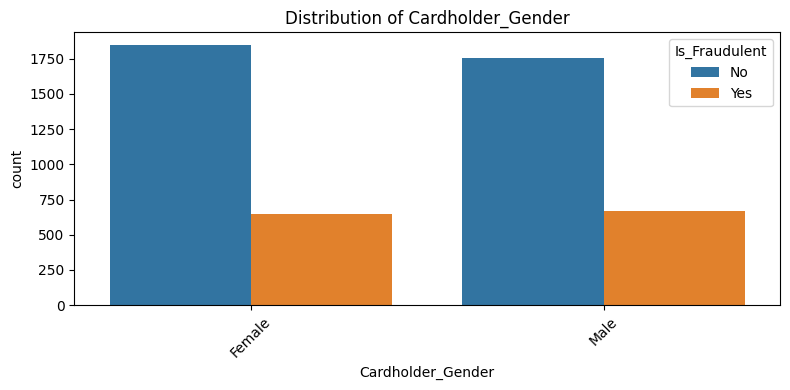

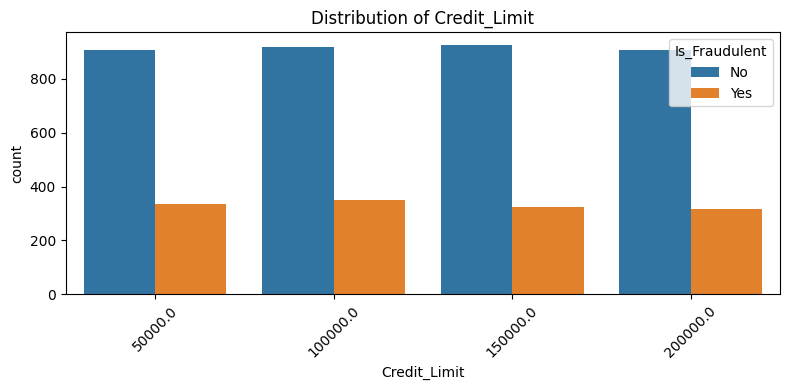

In [ ]:
categorical_cols =['Card_Type', 'Merchant_Category', 'Location', 'Region', 'Device_Type', 'Day_of_Week', 'Cardholder_Gender', 'Credit_Limit']
print("Categorical features:", categorical_cols)
# a) Analyze the distribution of categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, hue='Is_Fraudulent')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


numeric columns to plot:
['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit']
length of numeric_cols: 5


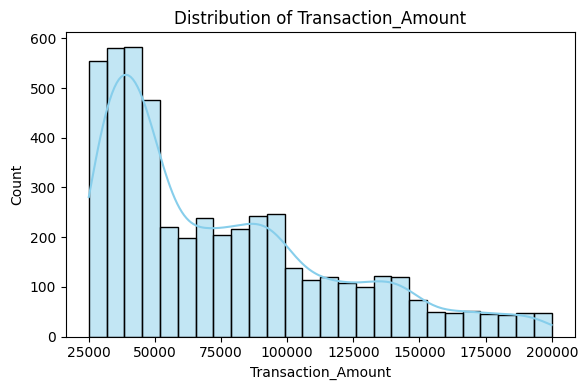

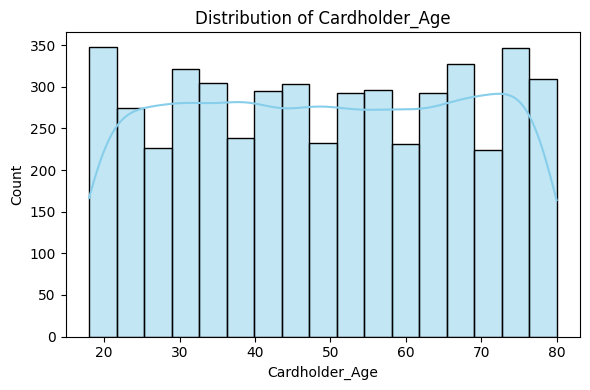

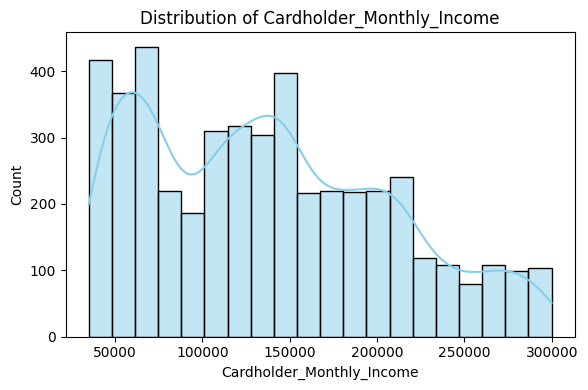

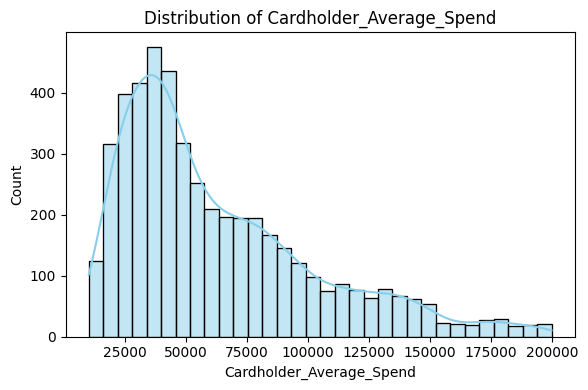

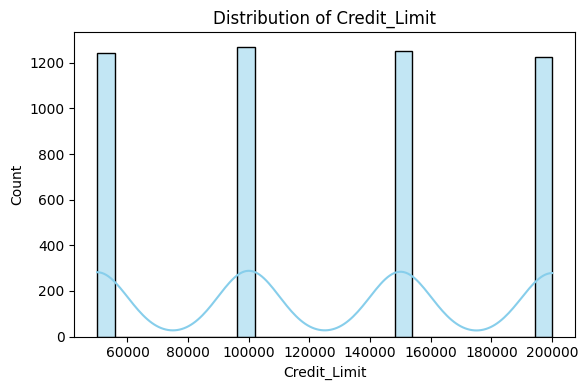

In [ ]:
# Explore numerical features:
numeric_cols = data.select_dtypes(exclude='object').columns.tolist()
print("numeric columns to plot:")
print(numeric_cols)
print("length of numeric_cols:",len(numeric_cols))
# Explore numerical features:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [ ]:
# skewness
print("Skewness:")
skewness=data[numeric_cols].skew()
skewness

Skewness:


,0
Transaction_Amount,0.968481
Cardholder_Age,-0.009025
Cardholder_Monthly_Income,0.428367
Cardholder_Average_Spend,1.155050
Credit_Limit,0.009972


In [ ]:
# Use descriptive statistics to understand their central tendency and spread.
print("Descriptive Statistics:")
print(data[numeric_cols].describe())

Descriptive Statistics:
       Transaction_Amount  Cardholder_Age  Cardholder_Monthly_Income  \
count         4994.000000     4865.000000                4686.000000   
mean         74667.995995       49.106680              137353.817542   
std          43089.045623       18.398524               69471.623020   
min          25008.000000       18.000000               35005.000000   
25%          39742.500000       33.000000               73485.000000   
50%          60922.000000       49.000000              131833.000000   
75%          98373.500000       65.000000              189054.250000   
max         199923.000000       80.000000              299907.000000   

       Cardholder_Average_Spend   Credit_Limit  
count               4792.000000    4991.000000  
mean               63058.343566  124654.377880  
std                40056.989704   55668.246494  
min                10282.410000   50000.000000  
25%                33336.742500  100000.000000  
50%                49547.945000  

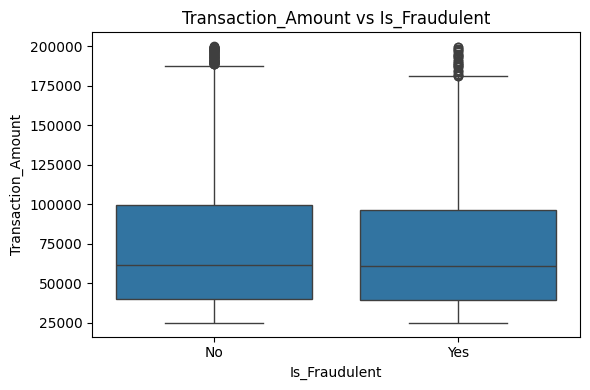

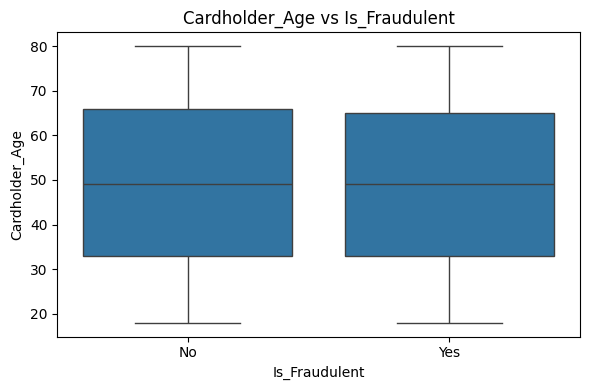

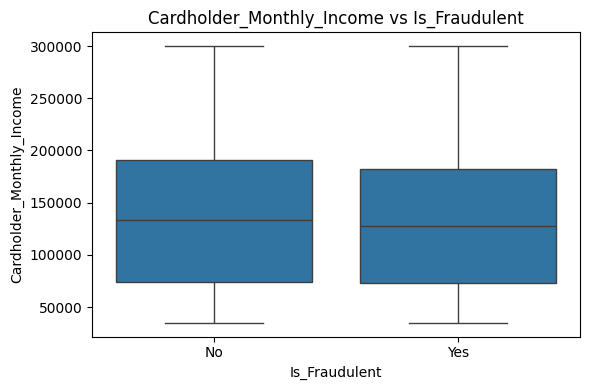

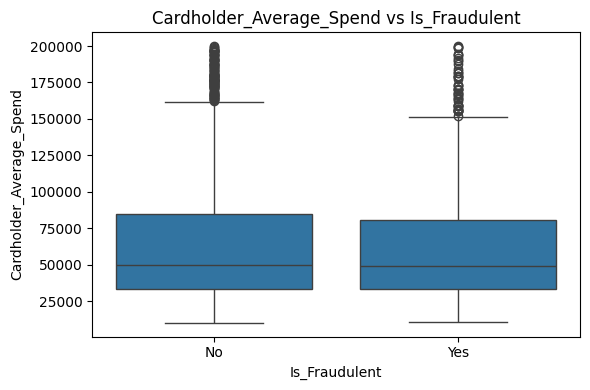

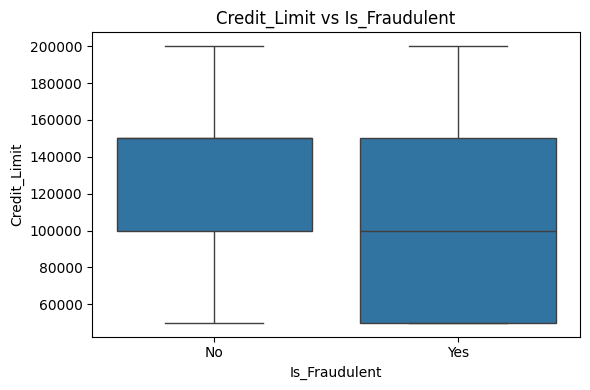

In [ ]:
# c) Bivariate Analysis

# Numerical vs Target (Transaction_Amount vs Is_Fraudulent)
import seaborn as sns
import matplotlib.pyplot as plt
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x='Is_Fraudulent', y=col)
    plt.title(f'{col} vs Is_Fraudulent')
    plt.tight_layout()
    plt.show()

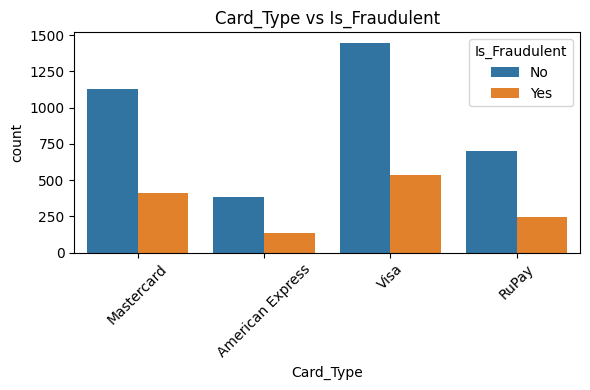

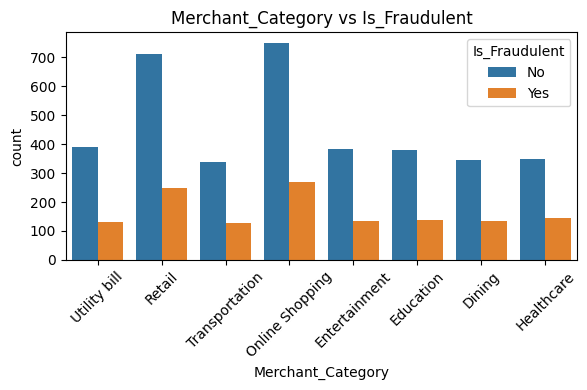

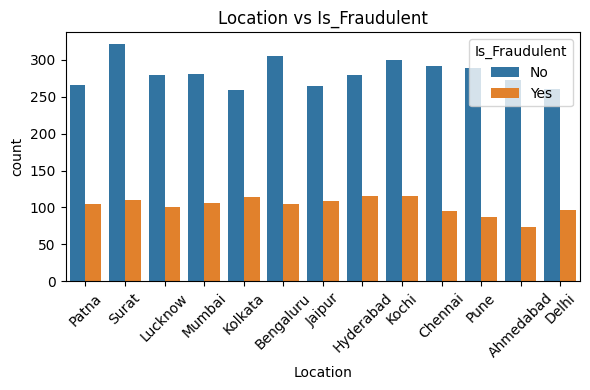

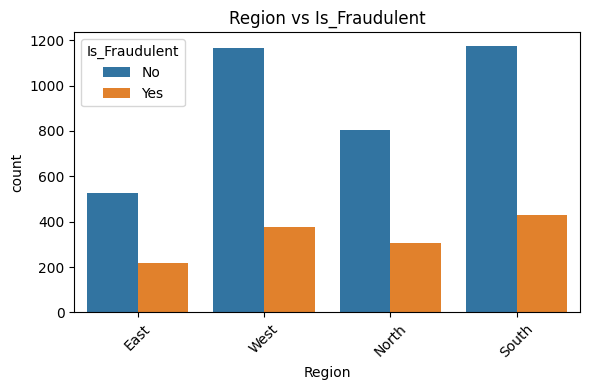

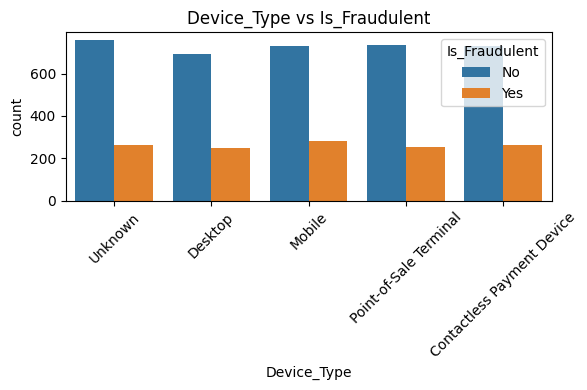

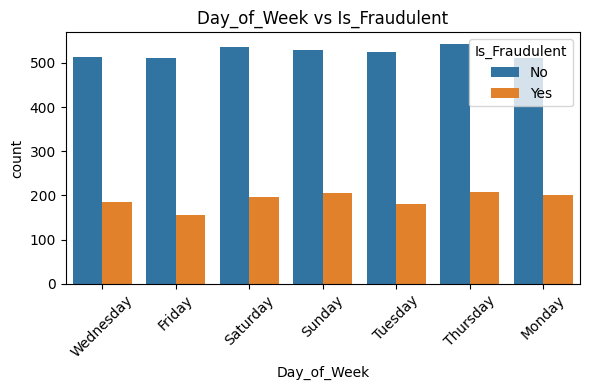

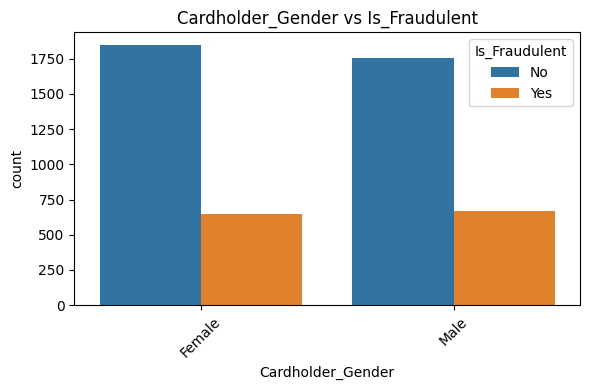

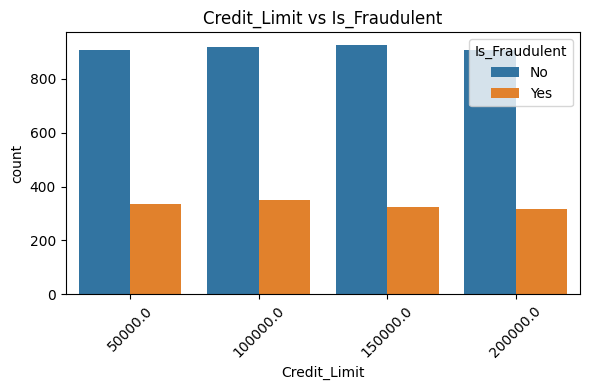

In [ ]:
# Categorical vs Target (Card_Type vs Is_Fraudulent)
import seaborn as sns
import matplotlib.pyplot as plt
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, hue='Is_Fraudulent')
    plt.title(f'{col} vs Is_Fraudulent')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

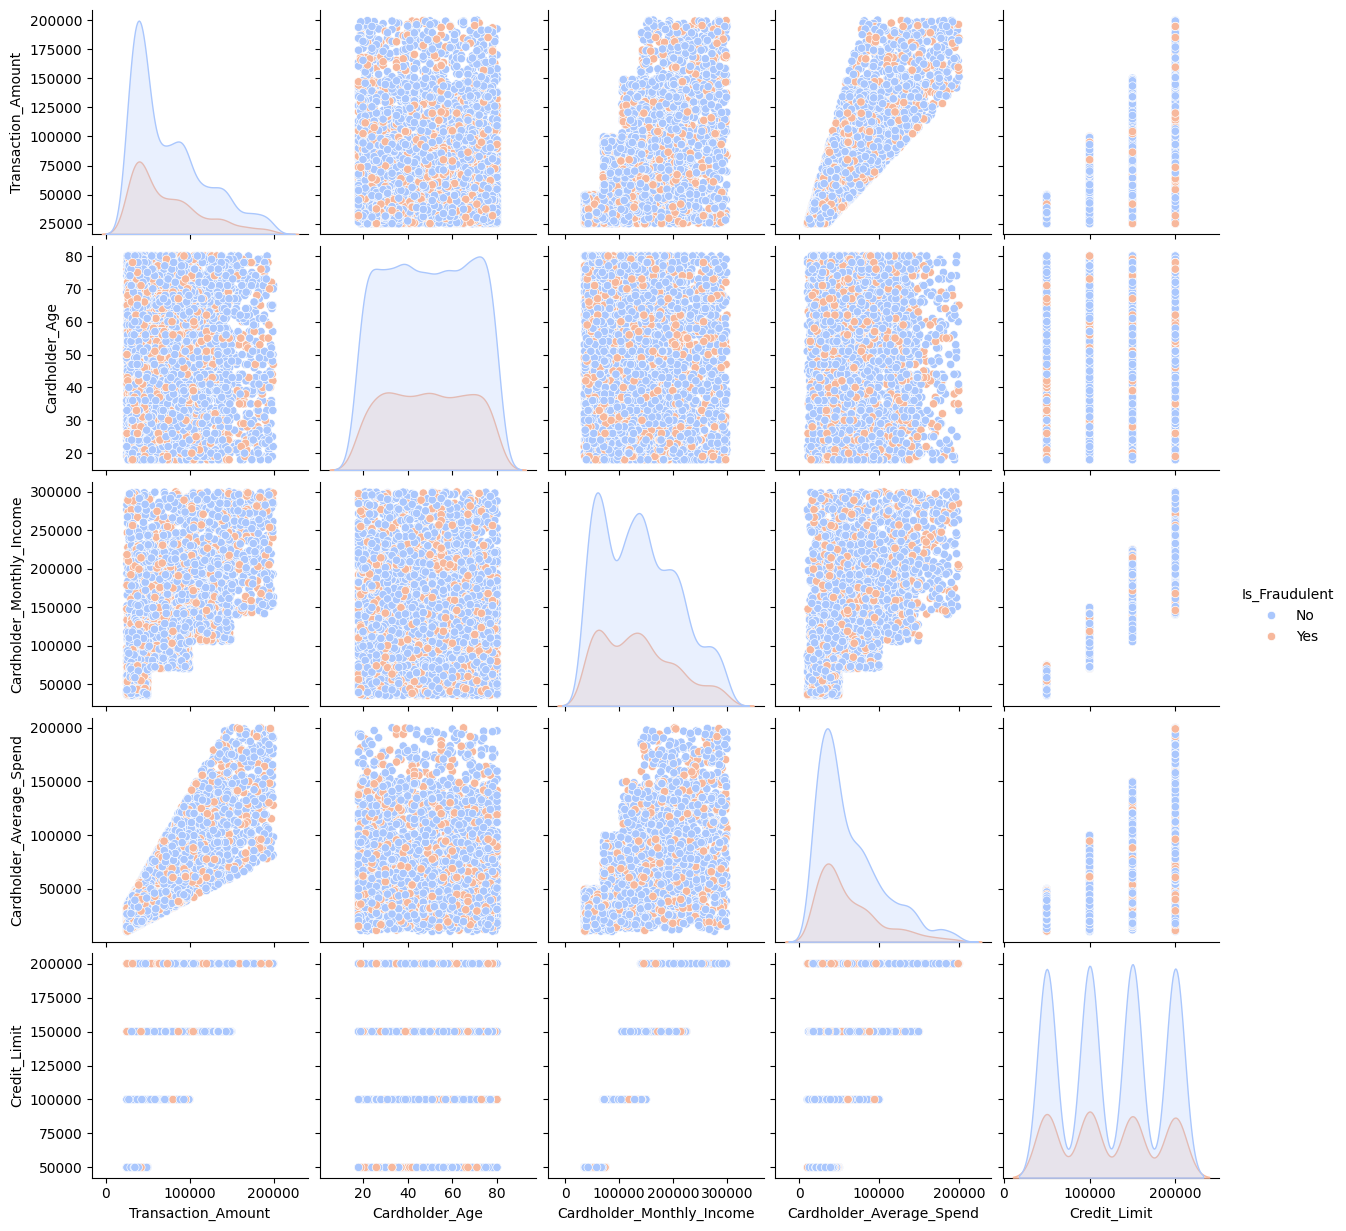

In [ ]:
# Multivariate Analysis
sns.pairplot(data, vars=numeric_cols, hue='Is_Fraudulent', palette='coolwarm')
plt.show()

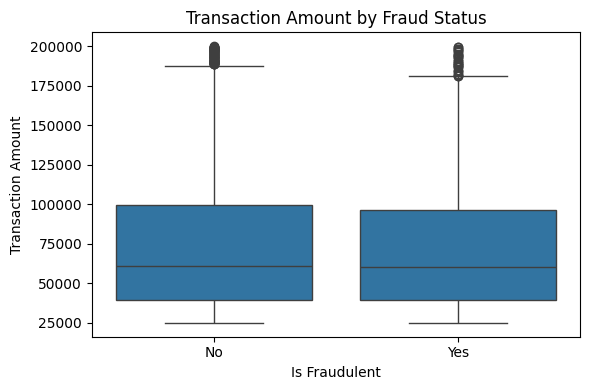

In [ ]:
# d) Visualize the distribution of transaction amounts for fraudulent vs. non-fraudulent transactions using histograms or box plots.
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Is_Fraudulent', y='Transaction_Amount')
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraudulent')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()

In [ ]:
# e) Investigate whether certain features are more susceptible to fraud.
# check binary format (0 = No, 1 = Yes)
if data['Is_Fraudulent'].dtype == 'object':
    data['Is_Fraudulent'] = data['Is_Fraudulent'].map({'Yes': 1, 'No': 0}).astype(int)

# Fraud rates for categorical features
for col in categorical_cols:
    fraud_rate = data.groupby(col)['Is_Fraudulent'].mean().sort_values(ascending=False)
    print(f"\nFraud Rate by {col}:\n", fraud_rate)



Fraud Rate by Card_Type:
 Card_Type
Mastercard          0.268831
Visa                0.268823
American Express    0.261122
RuPay               0.256600
Name: Is_Fraudulent, dtype: float64

Fraud Rate by Merchant_Category:
 Merchant_Category
Healthcare         0.294355
Dining             0.280665
Transportation     0.270386
Education          0.267823
Online Shopping    0.264966
Retail             0.259645
Entertainment      0.257253
Utility bill       0.249520
Name: Is_Fraudulent, dtype: float64

Fraud Rate by Location:
 Location
Kolkata      0.305630
Hyderabad    0.293671
Jaipur       0.292225
Patna        0.283019
Kochi        0.277108
Mumbai       0.273902
Delhi        0.271709
Lucknow      0.263852
Bengaluru    0.256098
Surat        0.255220
Chennai      0.245478
Pune         0.231383
Ahmedabad    0.210983
Name: Is_Fraudulent, dtype: float64

Fraud Rate by Region:
 Region
East     0.294355
North    0.275924
South    0.268202
West     0.244156
Name: Is_Fraudulent, dtype: float64

F

# 2) Data Preprocessing - Data Cleaning:

In [ ]:
# a) Handle Missing Values
print("Missing values before imputation:\n", data.isnull().sum())
# Impute categorical features with mode
for col in categorical_cols:
    mode_val = data[col].mode()[0]
    data[col].fillna(mode_val, inplace=True)
# Fill missing numerical with KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

print("Missing values after imputation:\n", data.isnull().sum())


Missing values before imputation:
 Transaction_ID                 0
Card_Type                     17
Merchant_Category             22
Transaction_Amount             6
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64


/tmp/ipython-input-480360100.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_val, inplace=True)


Missing values after imputation:
 Transaction_ID               0
Card_Type                    0
Merchant_Category            0
Transaction_Amount           0
Transaction_DateTime         0
Location                     0
Region                       0
Cardholder_Age               0
Cardholder_Gender            0
Cardholder_Monthly_Income    0
Cardholder_Average_Spend     0
Credit_Limit                 0
Device_Type                  0
Day_of_Week                  0
Is_Fraudulent                0
dtype: int64


In [ ]:
# b) Outlier Detection & Removal (IQR method)
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        before = df.shape[0]
        df = df[(df[col] >= lower) & (df[col] <= upper)]
        after = df.shape[0]
        print(f"{col}: Removed {before - after} outliers")
    return df

data = remove_outliers_iqr(data, numeric_cols)

Transaction_Amount: Removed 96 outliers
Cardholder_Age: Removed 0 outliers
Cardholder_Monthly_Income: Removed 0 outliers
Cardholder_Average_Spend: Removed 132 outliers
Credit_Limit: Removed 0 outliers


Transaction_Amount: skew = 0.93


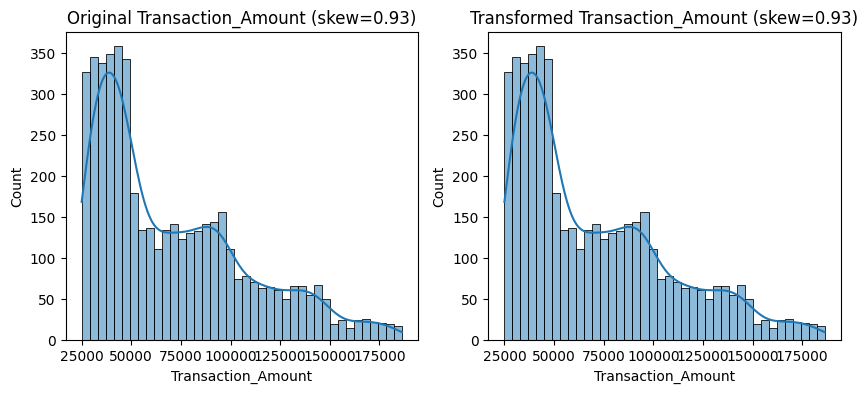

Cardholder_Age: skew = -0.01


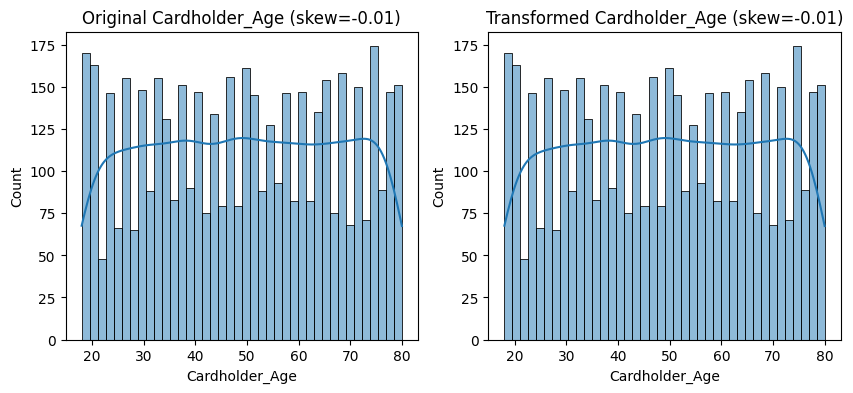

Cardholder_Monthly_Income: skew = 0.47


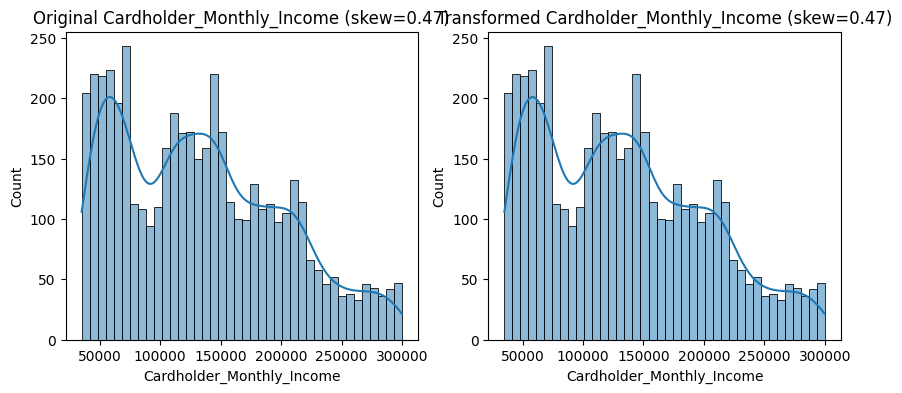

Cardholder_Average_Spend: skew = 0.91


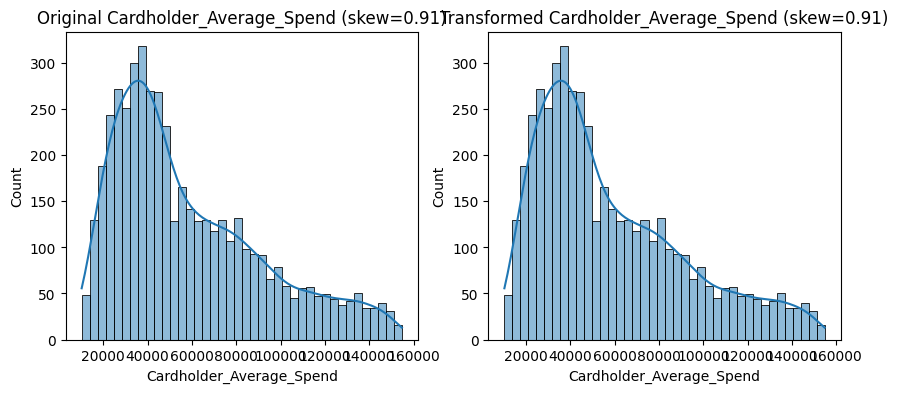

Credit_Limit: skew = 0.09


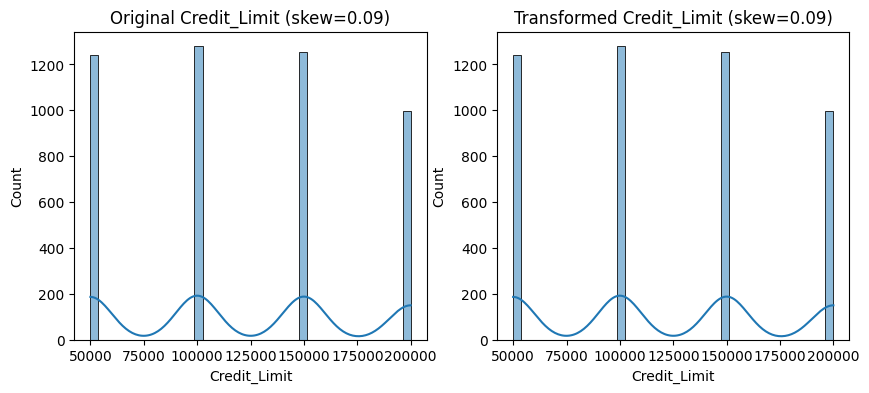


Highly skewed features: []


In [ ]:
# c) Assess skewness in numerical features by calculating the skewness score and visualize
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
# Dictionary to store skewness
skewness_dict = {}

for col in numeric_cols:
    # Original skewness
    skew_val = skew(data[col])
    skewness_dict[col] = skew_val
    print(f"{col}: skew = {skew_val:.2f}")

    # Plot original distribution
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(data[col], bins=40, kde=True)
    plt.title(f"Original {col} (skew={skew_val:.2f})")

    # Transform if highly skewed
    transformed = data[col]
    if abs(skew_val) > 1:
        transformed = np.log1p(data[col])
        data[col] = transformed
        print(f" --> log1p applied to {col}")

    # Plot transformed distribution
    plt.subplot(1,2,2)
    sns.histplot(transformed, bins=40, kde=True)
    plt.title(f"Transformed {col} (skew={skew(transformed):.2f})")
    plt.show()

# List of highly skewed columns
high_skew_cols = [col for col, val in skewness_dict.items() if abs(val) > 1]
print("\nHighly skewed features:", high_skew_cols)



## 3) Feature Engineering:

In [ ]:
# Identify categorical columns
categorical_cols = []

for col in data.columns:
    if data[col].dtype == 'object':
        categorical_cols.append(col)
    elif data[col].nunique() < 20 and col != 'Is_Fraudulent':
        categorical_cols.append(col)

print("Categorical features detected:", categorical_cols)
print("Number of categorical features:", len(categorical_cols))


Categorical features detected: ['Transaction_ID', 'Card_Type', 'Merchant_Category', 'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender', 'Credit_Limit', 'Device_Type', 'Day_of_Week']
Number of categorical features: 10


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode all categorical columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


# 4) Feature Selection:

In [ ]:
# features and target
X = data.drop('Is_Fraudulent', axis=1)
y = data['Is_Fraudulent']

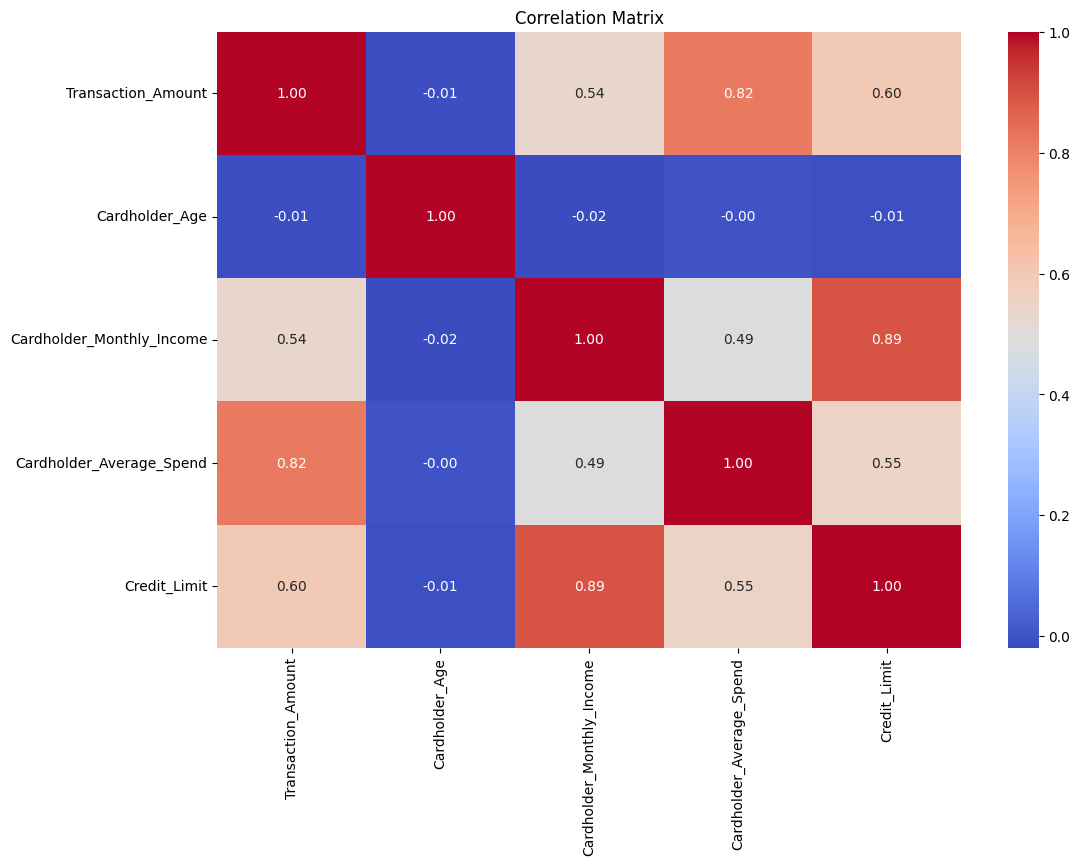

In [ ]:
# Compute correlation matrix
corr_matrix = data[numeric_cols].corr()

# Display correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 5) Split data into training and testing:

In [ ]:
# Split the dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y,random_state=42)
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif
k=10
selector=SelectKBest(score_func=f_classif,k=k)
selector.fit(X,y)

SelectKBest()

In [ ]:
# get the selected features names
selected_features=X.columns[selector.get_support()]
selected_features

Index(['Transaction_ID', 'Merchant_Category', 'Transaction_Amount',
       'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender',
       'Cardholder_Monthly_Income', 'Cardholder_Average_Spend',
       'Credit_Limit'],
      dtype='object')

In [ ]:
X_selected=X[selected_features]

In [ ]:
scores=selector.scores_
feature_scores=pd.DataFrame({'Feature':X.columns,
                            'score':scores}).sort_values(by='score',ascending=False)

In [ ]:
feature_scores[:10]['Feature'].values

array(['Region', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend',
       'Transaction_Amount', 'Cardholder_Gender', 'Transaction_ID',
       'Credit_Limit', 'Merchant_Category', 'Location',
       'Transaction_DateTime'], dtype=object)

# 6) Feature Scaling:

In [ ]:
# feature scaling:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling complete. Scaled train shape:", X_train_scaled.shape)
print("Feature scaling complete. Scaled train shape:", X_test_scaled.shape)

Feature scaling complete. Scaled train shape: (3579, 14)
Feature scaling complete. Scaled train shape: (1193, 14)


# 7) Build the Machine Learning Model:

In [ ]:
# 1) Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
# 2)Initialize the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Navie Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# 3) Evaluate each classifier
from sklearn.metrics import accuracy_score, f1_score
# Initialize an empty dictionary to store the results
results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = clf.predict(X_test_scaled)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Store the results
    results[name] = {'Accuracy': accuracy, 'F1 score': f1}
# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T
# Print the DataFrame
print(results_df)
# Select best model based on F1 score
best_model_name = results_df.index[0]
print(f"\nBest model for fraud detection (F1-score prioritized): {best_model_name}")


                     Accuracy  F1 score
Logistic Regression  0.523889  0.377193
Decision Tree        0.615256  0.246305
Random Forest        0.733445  0.000000
SVM                  0.507963  0.347052
K-Nearest Neighbors  0.668064  0.146552
Naive Bayes          0.734283  0.000000
XGBoost              0.683990  0.121212

Best model for fraud detection (F1-score prioritized): Logistic Regression


# Logistic Regression is the best performer comparing with overall model F1 score highest priority 0.377193

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=500)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[876,   0],
       [317,   0]])

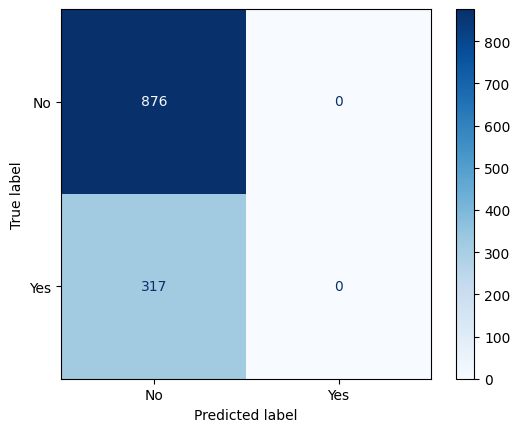

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test,
    display_labels=['No', 'Yes'],
    cmap='Blues',
)
plt.show()


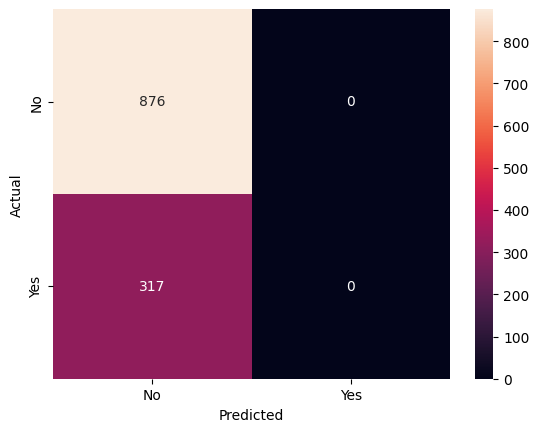

In [ ]:

labels=['No', 'Yes']
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score,classification_report
print(f"Precision={precision_score(y_test,y_pred):.4f}")
print(f"Recall={recall_score(y_test,y_pred):.4f}")

Precision=0.0000
Recall=0.0000


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       876
           1       0.00      0.00      0.00       317

    accuracy                           0.73      1193
   macro avg       0.37      0.50      0.42      1193
weighted avg       0.54      0.73      0.62      1193



In [ ]:
# k-fold cross validation
from sklearn.model_selection import KFold, cross_val_score

# 5-Fold cross validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Print header
print(f"{'Classifier':<25}{'Mean Accuracy':<20}{'Mean F1-score':<20}")

# Iterate through classifiers and perform cross-validation
for name, clf in classifiers.items():
    accuracy_scores = cross_val_score(clf, X_selected, y, cv=kf, scoring='accuracy')
    f1_scores = cross_val_score(clf, X_selected, y, cv=kf, scoring='f1_weighted')
    print(f"{name:<25}{accuracy_scores.mean():<20.4f}{f1_scores.mean():<20.4f}")


Classifier               Mean Accuracy       Mean F1-score       
Logistic Regression      0.5197              0.5475              
Decision Tree            0.6065              0.6055              
Random Forest            0.7322              0.6235              
SVM                      0.4566              0.4777              
K-Nearest Neighbors      0.6806              0.6364              
Naive Bayes              0.7343              0.6218              
XGBoost                  0.6865              0.6281              


In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define model
model = LogisticRegression(max_iter=1000, random_state=42)

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters & score
print("Best parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 0.01, 'solver': 'lbfgs'}
Best F1 Score: 0.6217808575252546


In [ ]:
# evaluate the best model on the test set
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test_scaled)

In [ ]:
# Logistic regression Hypertuned:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression Hypertuned:\t Accuracy={accuracy:.4f},\t F1 score={f1:.4f}")


Logistic Regression Hypertuned:	 Accuracy=0.5574,	 F1 score=0.3514


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['No','Yes']))


              precision    recall  f1-score   support

          No       0.75      0.60      0.66       876
         Yes       0.29      0.45      0.35       317

    accuracy                           0.56      1193
   macro avg       0.52      0.52      0.51      1193
weighted avg       0.63      0.56      0.58      1193



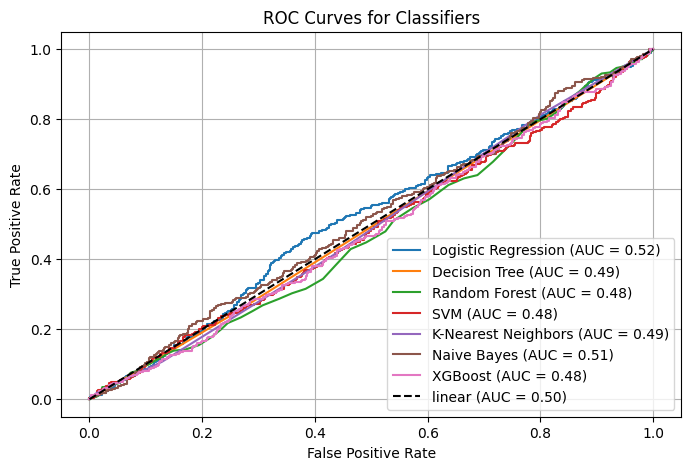

In [ ]:
# ROC curve & AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(8, 5))

for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train_scaled, y_train)

    # Get the “score” / probability  positive class
    if hasattr(clf, "predict_proba"):
        y_probs = clf.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(clf, "decision_function"):
        y_probs = clf.decision_function(X_test_scaled)

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
    auc_score = roc_auc_score(y_test, y_probs)

    # Plot ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot diagonal line for linear classifier
plt.plot([0, 1], [0, 1], 'k--', label='linear (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Conclusion

The project demonstrates how machine learning can be applied to detect credit card fraud effectively. By analyzing transaction and cardholder data, the model identifies high-risk transactions, reducing potential financial loss while ensuring a smoother experience for genuine users. ROC curves and AUC metrics confirm the model’s reliability, and feature analysis provides actionable insights for fraud prevention.

## Future Enhancements

1.Handle Imbalanced Data Better

2.Feature Engineering

- Create new features from transaction patterns, such as:

- Time of transaction (odd hours)

- Frequent merchant categories

3.Large deviations from average spend

- This can help the model detect fraud more accurately.

4. Ensemble Models

- Use Random Forest, XGBoost perform better on imbalanced datasets.

5.Real-Time Detection

- Deploy the model in a streaming environment for instant fraud detection.

# Model Optimization

Hyperparameter Tuning

Use GridSearchCV or RandomizedSearchCV to find the best parameters for:

- Logistic Regression (C, solver)

- Random Forest (n_estimators, max_depth)

- XGBoost (learning_rate, max_depth)

Cross-Validation

- Apply k-fold cross-validation to ensure the model generalizes well to new data.